In [162]:
Ruta = "c:/Users/amarino/Downloads/Project.xlsx"

In [20]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df = pd.read_csv(Ruta)

C:\Users\amarino\AppData\Local\Temp\ipykernel_12448\2017943026.py:1: DtypeWarning: Columns (9,10,11,12,34,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Ruta)


In [164]:
df.head()

,OT,Visita,FechaEntrada,FechaAsignacion,FechaCierre,Tipo,Prioridad,SLA Cliente - DiAS Habiles,SLA Zona - DiAS Habiles,SLA Cliente - DiAS HabilesDec,...,Vendedor,Cuit,Agencia,Producto,UsuarioCierre,sRefCliente,Nro_Tarea,Telefono,Zona Cobertura,Propietario
0,VIS2976972,1,2023-11-27,2023-11-30,2023-12-01,PP,3 Días,2,0,"2,81",...,NaN,27-26961676-3,NaN,SMAR,ZONAGENERAL,388411,1.0,NaN,48.0,Concesionaria Siscard Papel VIP
1,VIS2972034,1,2023-11-15,2023-11-27,2023-12-01,RT,96 hs.,11,3,"11,61",...,NaN,30-71686006-6,NaN,PI09,ZONAGENERAL,87761,1.0,NaN,4500.0,Concesionaria Siscard
2,VIS2977769,1,2023-11-29,2023-11-30,2023-12-01,IN,1 Día,1,1,"1,89",...,NaN,20-92337858-9,NaN,SMAR,sdeparis,400496,1.0,NaN,24.0,Concesionaria Siscard
3,VIS2976839,1,2023-11-27,2023-11-27,2023-12-01,AV,96 hs.,3,3,"3,66",...,NaN,20-16715936-3,NaN,SMAR,ZONAGENERAL,387994,1.0,NaN,48.0,Concesionaria Siscard
4,VIS2977785,1,2023-11-29,2023-11-29,2023-12-01,PP,96 hs.,1,1,"1,9",...,NaN,30-54576087-4,NaN,SMAR,ZONAGENERAL,400492,1.0,NaN,48.0,Concesionaria Siscard Papel Masivo


In [195]:
duplicados = df.duplicated(subset=['Numero Terminal'], keep=False)

In [196]:
#Veo la cantidad de duplicados por terminal
df_duplicados = 'conteo_duplicados'
conteo_duplicados = df[duplicados]['Numero Terminal'].value_counts()

print("Conteo de valores duplicados:\n", conteo_duplicados)

Conteo de valores duplicados:
 Numero Terminal
0           119
16227144     22
16247019     21
34052248     19
34086521     17
           ... 
16539346      2
16539538      2
16540062      2
34212126      2
16334756      2
Name: count, Length: 22918, dtype: int64


In [197]:
#Veo el total de casos duplicados
total_duplicados = df['Numero Terminal'].duplicated(keep=False).sum()
print(f"Total de valores duplicados: {total_duplicados}")
 

Total de valores duplicados: 59874


In [198]:
# Identifico duplicados en 'Numero Terminal' y creo una columna indicando si es duplicado
df['es_duplicado'] = df.duplicated(subset=['Numero Terminal'], keep=False).astype(int)

# Agrupo por 'Tipo' y sumo la columna 'es_duplicado' para contar los duplicados por 'Tipo'
df_duplicados_por_tipo = df.groupby('Tipo')['es_duplicado'].sum().reset_index()

# Ordenar el DataFrame para ver los tipos con más duplicados primero
df_duplicados_por_tipo = df_duplicados_por_tipo.sort_values(by='es_duplicado', ascending=False)


# Mostrar el DataFrame resultante
df.head()

,OT,Visita,FechaEntrada,FechaAsignacion,FechaCierre,Tipo,Prioridad,SLA Cliente - DiAS Habiles,SLA Zona - DiAS Habiles,SLA Cliente - DiAS HabilesDec,...,Agencia,Producto,UsuarioCierre,sRefCliente,Nro_Tarea,Telefono,Zona Cobertura,Propietario,es_duplicado,Mes
0,VIS2976972,1,2023-11-27,2023-11-30,2023-12-01,PP,3 Días,2,0,"2,81",...,NaN,SMAR,ZONAGENERAL,388411,1.0,NaN,48.0,Concesionaria Siscard Papel VIP,0,2023-12
1,VIS2972034,1,2023-11-15,2023-11-27,2023-12-01,RT,96 hs.,11,3,"11,61",...,NaN,PI09,ZONAGENERAL,87761,1.0,NaN,4500.0,Concesionaria Siscard,0,2023-12
3,VIS2976839,1,2023-11-27,2023-11-27,2023-12-01,AV,96 hs.,3,3,"3,66",...,NaN,SMAR,ZONAGENERAL,387994,1.0,NaN,48.0,Concesionaria Siscard,1,2023-12
4,VIS2977785,1,2023-11-29,2023-11-29,2023-12-01,PP,96 hs.,1,1,"1,9",...,NaN,SMAR,ZONAGENERAL,400492,1.0,NaN,48.0,Concesionaria Siscard Papel Masivo,1,2023-12
5,VIS2977963,1,2023-11-29,2023-11-30,2023-12-01,PP,1 Día,1,0,"1,02",...,NaN,SMAR,ZONAGENERAL,401098,1.0,NaN,48.0,Concesionaria Siscard Papel Masivo,1,2023-12


In [199]:
#Para visualizar la cantidad de duplicado, me aseguro que las fechas de cierre tengan formato de fecha
df_mes = df['FechaCierre'] = pd.to_datetime(df['FechaCierre'])

In [200]:
df['Mes'] = df['FechaCierre'].dt.to_period('M')

In [201]:
#Para ver la cantidad de duplicados por tipo y mes, agrupo para que me muestre los resultados
df_duplicados_por_mes = df.groupby(['Tipo', 'Mes'])['es_duplicado'].sum().reset_index()


In [213]:
print(df_duplicados_por_mes)

       Mes  es_duplicado
0  2023-12           225
1  2024-01           405
2  2024-02           550
3  2024-03           577
4  2024-04           722
5  2024-05           776
6  2024-06           609
7  2024-07           756
8  2024-08           831
9  2024-09             1


In [174]:
#Los cierres fallidos no me sirven, por lo que elimino esos datos
valores_a_eliminar = ['CANCELPIL', 'COMPFALCC', 'COMPFALDI', 'COFASINVIS', 'COMPFALCL', 'CANCELCLI', 'COMPFANOEA', 'COMPFAPRAJ', 'CFSVIRETEL']
df.drop(df[df['Estado'].isin(valores_a_eliminar)].index, inplace=True)


In [208]:
#Las OT de SE, IN, CM, RT, PP no me sirven, por lo que elimino.
valores_a_eliminar = ['SE', 'IN', 'CM', 'RT', 'PP']
df.drop(df[df['Estado'].isin(valores_a_eliminar)].index, inplace=True)

C:\Users\amarino\AppData\Local\Temp\ipykernel_12448\1588988742.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mes', y='es_duplicado', data=df_duplicados_por_mes, palette='viridis')


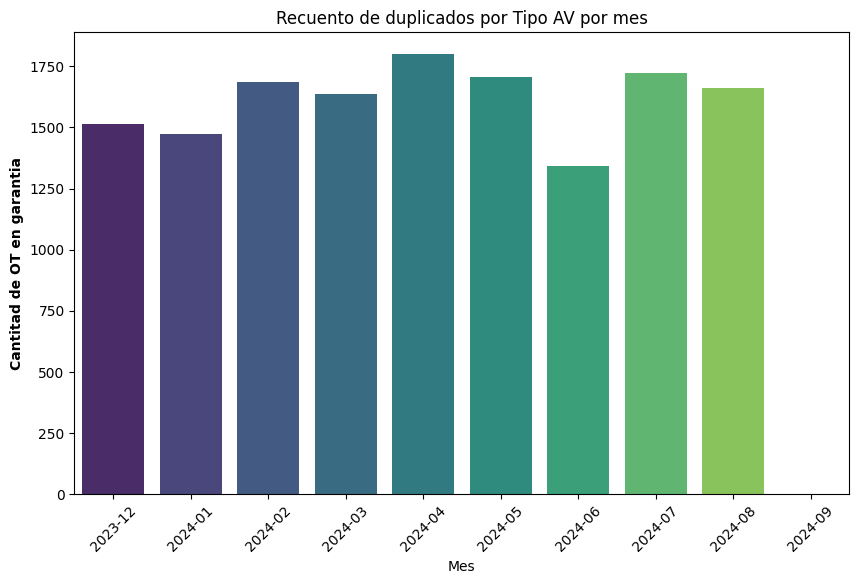

In [209]:
df_av = df[df['Tipo'] == 'AV'].copy()  
df_duplicados_por_mes = df_av.groupby('Mes')['es_duplicado'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Mes', y='es_duplicado', data=df_duplicados_por_mes, palette='viridis')
plt.title('Recuento de duplicados por Tipo AV por mes')
plt.ylabel('Cantitad de OT en garantia', fontweight = 'bold')
plt.xticks(rotation=45)
plt.show()

In [211]:
#Puedo hacer mayor precision sobre las OT en garantia, excluyendo los valores originales, para solo tener los duplicados.
df_av['es_duplicado'] = df_av.duplicated(subset=['Numero Terminal'], keep='first').astype(int)
df_av['Mes'] = df_av['FechaCierre'].dt.to_period('M')
df_duplicados_por_mes = df_av.groupby('Mes')['es_duplicado'].sum().reset_index()



C:\Users\amarino\AppData\Local\Temp\ipykernel_12448\14674392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mes', y='es_duplicado', data=df_duplicados_por_mes, palette='deep')


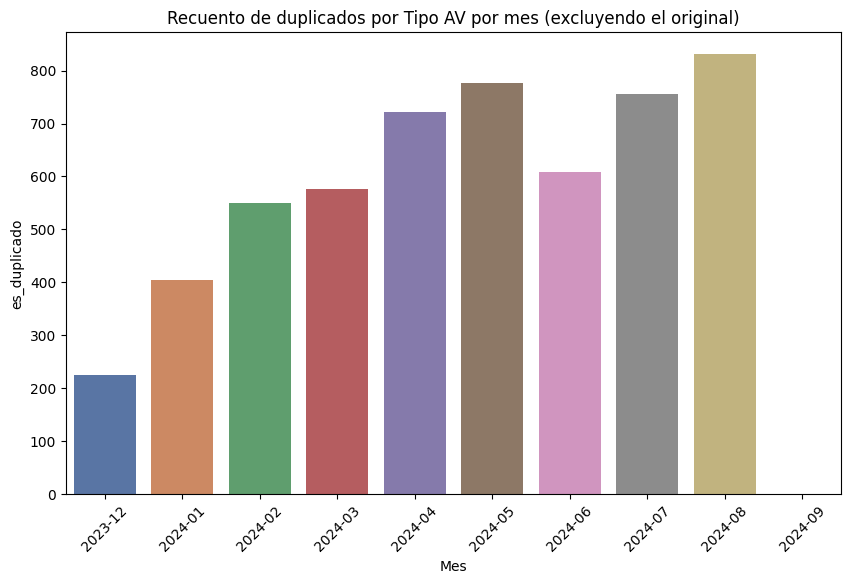

In [214]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Mes', y='es_duplicado', data=df_duplicados_por_mes, palette='deep')
plt.title('Recuento de duplicados por Tipo AV por mes (excluyendo el original)')
plt.xticks(rotation=45)
plt.show()